## PDF Scraper 
### We created a pdf scraper that will loook into the yearly reports from a company and check/compile which SDG they are looking into. We visualize the data to show which was used through the years.

In [6]:
import re
from pdfminer.high_level import extract_text
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def extract_text_counts(pdf_file_path, search_patterns):
    """
    Extract text from pdf file and get the counts of the occurrence of
    each search pattern.

    Args:
        pdf_file_path: string - filepath of the pdf file.
        search_patterns: list<string/regex> - list of search patterns can be string or regular expression.
    Returns:
        Dicionary containing the text found and their occurrence count.
    """
    
    # Initialize a dictionary to store the counts of each found phrase
    phrase_counts = {}
    
    # Extract text from the PDF
    text = extract_text(pdf_file_path)
    
    # Search for the specified patterns and update counts
    for pattern in search_patterns:
        matches = re.finditer(pattern, text)
        for match in matches:
            matched_phrase = match.group(0)  # Get the matched phrase
            if matched_phrase not in phrase_counts:
                phrase_counts[matched_phrase] = 1
            #else:
            #    phrase_counts[matched_phrase] += 1
                
    return phrase_counts
    

In [9]:
def display_counts(phrase_counts):
    """
    Iterate through the dictionary and display the counts for each pattern.

    Args:
        phrase_counts: dictionary - contains the text found and their occurrence count.
    """
    # Output the found phrases and their counts
    for pattern, counts in phrase_counts.items():
        print(f"{pattern} count: {counts}")
    

In [10]:
def plot_results(results):
    """
    Takes the results dictionary and shows a heatmap of which SDGs are being supported/used per year.

    Args:
        results: dictionary - containing the year as key and text found with their occurrence count as value
    Returns:
        None
    """
    
    data = results
    targets = list(set(target for year_data in data.values() for target in year_data.keys()))
    years = list(data.keys())

    # Create a matrix to store the data
    matrix = [[data[year].get(target, 0) for year in years] for target in targets]

    # Sort the targets
    targets = sorted(targets, key=lambda x: float(x.split()[1]))

    fig, ax = plt.subplots(figsize=(15, 10))
    cax = ax.matshow(matrix, cmap=plt.cm.Blues)

    # Adjust tick spacing
    ax.set_xticks(np.arange(len(years)))
    ax.set_yticks(np.arange(len(targets)))

    # Label the ticks
    ax.set_xticklabels(years)
    ax.set_yticklabels(targets)

    # Rotate the x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=60, ha="center")

    plt.xlabel('Year')
    plt.ylabel('Targets')

    plt.title('Targets Used Each Year')

    plt.show()

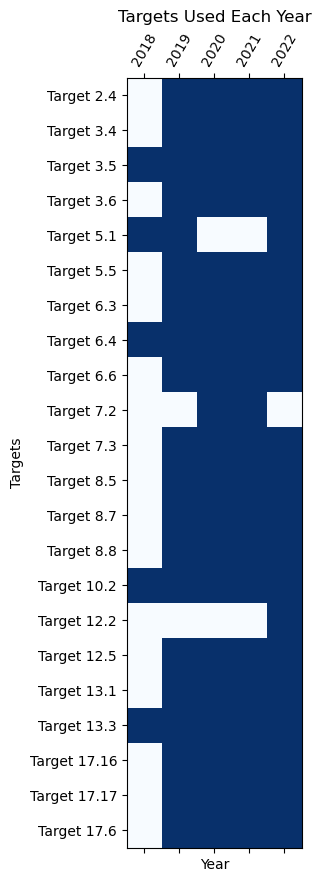

In [11]:
# Dictionary that contains the paths of the reports as values and the year as keys
pdf_file_paths = {
    "2018" : "Documents/OBP-Report-EN-2018.pdf",
    "2019" : "Documents/2019-SDG-Report-FINAL_1.pdf",
    "2020" : "Documents/SDG-Report_2020_EN.pdf",
    "2021" : "Documents/SDG-Report-2021-EN.pdf",
    "2022" : "Documents/SDG Report 2022.pdf",
}

# Initialize the results dictionary that will contain the serach results per year
results = {}

# Initialize the search patterns we will use.
search_patterns = [
    r"Target (\d+\.\d+)",  # Example regular expression: "Target 1.2"
    r"SDG (\d+\.\d+)",  # Example regular expression: "SDG 1.2"
]

# Runs the extract_text_counts() for each year and storing them in results
for key, pdf_file_path in pdf_file_paths.items():
    phrase_counts = extract_text_counts(pdf_file_path= pdf_file_path, search_patterns=search_patterns)
    results[key] = phrase_counts

#plots the results    
plot_results(results=results)